In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\ftska\all projects\sample_project_2\Mini_Project\data\data_1\datain_1.csv")
df

,AP1,angle_AP1,location_AP1_X,location_AP1_y,AP2,angle_AP2,location_AP2_X,location_AP2_y,AP3,angle_AP3,location_AP3_X,location_AP3_y,target_X,target_y
0,-45,44.25,9.6,7.5,-34,0.00,0,0,-40,78.83,0,7.5,1.5,0.0
1,-40,44.25,9.6,7.5,-38,0.00,0,0,-39,78.83,0,7.5,1.5,0.0
2,-40,44.25,9.6,7.5,-39,0.00,0,0,-40,78.83,0,7.5,1.5,0.0
3,-40,44.25,9.6,7.5,-35,0.00,0,0,-39,78.83,0,7.5,1.5,0.0
4,-40,44.25,9.6,7.5,-35,0.00,0,0,-39,78.83,0,7.5,1.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,-26,75.96,9.6,7.5,-47,35.41,0,0,-49,7.59,0,7.5,9.6,4.0
847,-26,75.96,9.6,7.5,-48,35.41,0,0,-49,7.59,0,7.5,9.6,4.0
848,-25,75.96,9.6,7.5,-47,35.41,0,0,-49,7.59,0,7.5,9.6,4.0
849,-25,75.96,9.6,7.5,-49,35.41,0,0,-49,7.59,0,7.5,9.6,4.0


In [2]:
df.shape, df.size

((851, 14), 11914)

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
np.random.seed(42)
# Extract the features and target variables
X = df.drop(["target_X", "target_y"], axis=1)
y = df[["target_X", "target_y"]]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.9998740786367114

In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Evaluate the model
y_preds = model.predict(X_test)
print("Regressor model on the test set")
print(f"r2:{r2_score(y_test, y_preds)*100:2f}%")
print(f"mae:{mean_absolute_error(y_test, y_preds)*100:2f}%")
print(f"mse:{mean_squared_error(y_test, y_preds)*100:2f}%")

Regressor model on the test set
r2:99.987408%
mae:0.302632%
mse:0.084803%


In [5]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)




<Figure size 1000x500 with 0 Axes>

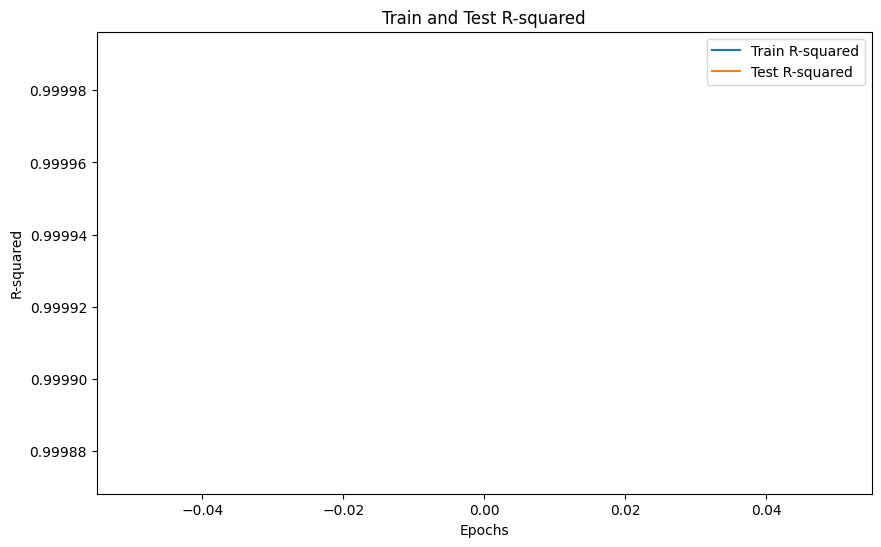

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the train and test R-squared scores
ax.plot(train_r2, label='Train R-squared')
ax.plot(test_r2, label='Test R-squared')

# Add labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('R-squared')
ax.set_title('Train and Test R-squared')
ax.legend()